In [1]:
from github import Github
import networkx as nx
import pickle
import random
import json
import numpy as np
import matplotlib.pyplot as plt 
import re

# Graph Setup

In [2]:
with open('./G.pickle', 'rb') as handle:
    G = pickle.load(handle)

Make a directed graph out of it with node types "user" and "Project"

In [3]:
with open('./crypto_stargazers_dict.pickle', 'rb') as handle:
    crypto_stargazers_dict = pickle.load(handle)
    
Stargaze_Network = nx.DiGraph()

# Setup network as Digraph with User -> CC
for crypto_name, stargazers_list in crypto_stargazers_dict.items():
    for user in stargazers_list:
        if user.login not in Stargaze_Network.nodes():
            Stargaze_Network.add_node(user.login, Type="User")
        if crypto_name not in Stargaze_Network.nodes():
            Stargaze_Network.add_node(crypto_name, Type="Currency")
        Stargaze_Network.add_edge(user.login, crypto_name, type="gazes")


# Analysis of basic properties

Summary stats

In [4]:
# Number uf users and currencies
users = []
currencies = []
for node, data in Stargaze_Network.nodes(data=True):
    if data["Type"]=="User":
        users.append(node)
    else:
        currencies.append(node)
    

print("Total number of currencies:", len(currencies))
print("Total number of users:", len(users))
print("Total number of stars:", len(Stargaze_Network.edges()))

Total number of currencies: 317
Total number of users: 40822
Total number of stars: 57462


[32250  5347  1599   669   338   223   109    82    40    42    30    24
    20     6     7    10     5     6     3     2     2     0     0     1
     1     0     2     0     0     0     0     1     0     0     0     0
     0     1     0     1     0     0     1]


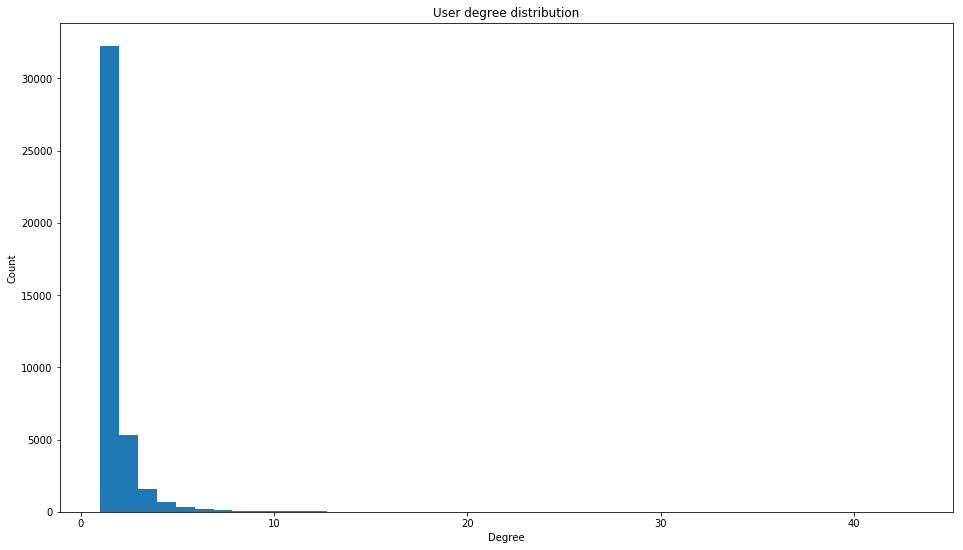

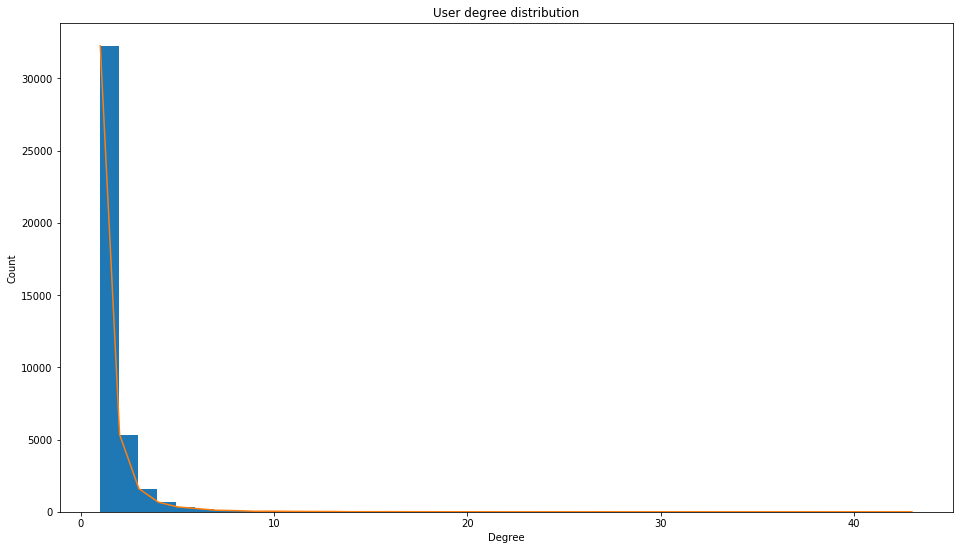

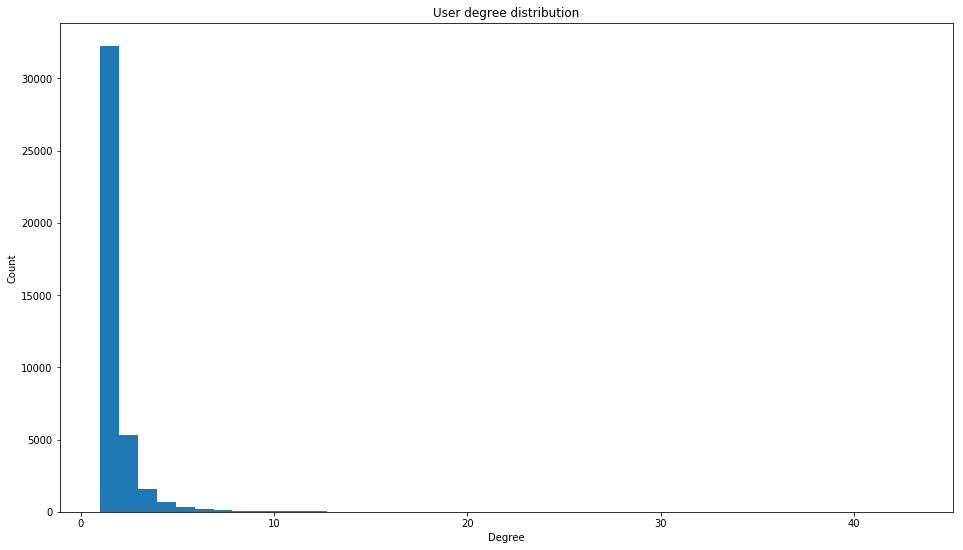

In [36]:
# Out-degree of users
users_out = Stargaze_Network.out_degree(users)

# Degrees only
users_deg = [d[1] for d in users_out]

# Make Histogram
users_hist, users_bin = np.histogram(users_deg, bins=max(users_deg))
print(users_hist)

plt.plot([x+1 for x in range(max(users_deg))], users_hist)
plt.show()

fig = plt.figure(figsize=(16,9))
plt.hist(users_deg, bins=max(users_deg))
plt.title("User degree distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

This distribution follows a heavy power law. Many users only follow 1 or 2 currencies, the max is 43.

In [33]:
# In-degrees of currencies
curr_in = Stargaze_Network.in_degree(currencies)

# Degrees only
curr_deg = [d[1] for d in curr_in]

# Make Histogram
fig = plt.figure(figsize=(16,9))
plt.hist(curr_deg, bins=30)
plt.title("Currency degree distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show

Here, bitcoin (obviously) takes the cake with nearly 20000 stargazers. Most currencies have only a few followers. This is a power-law dstribution again.

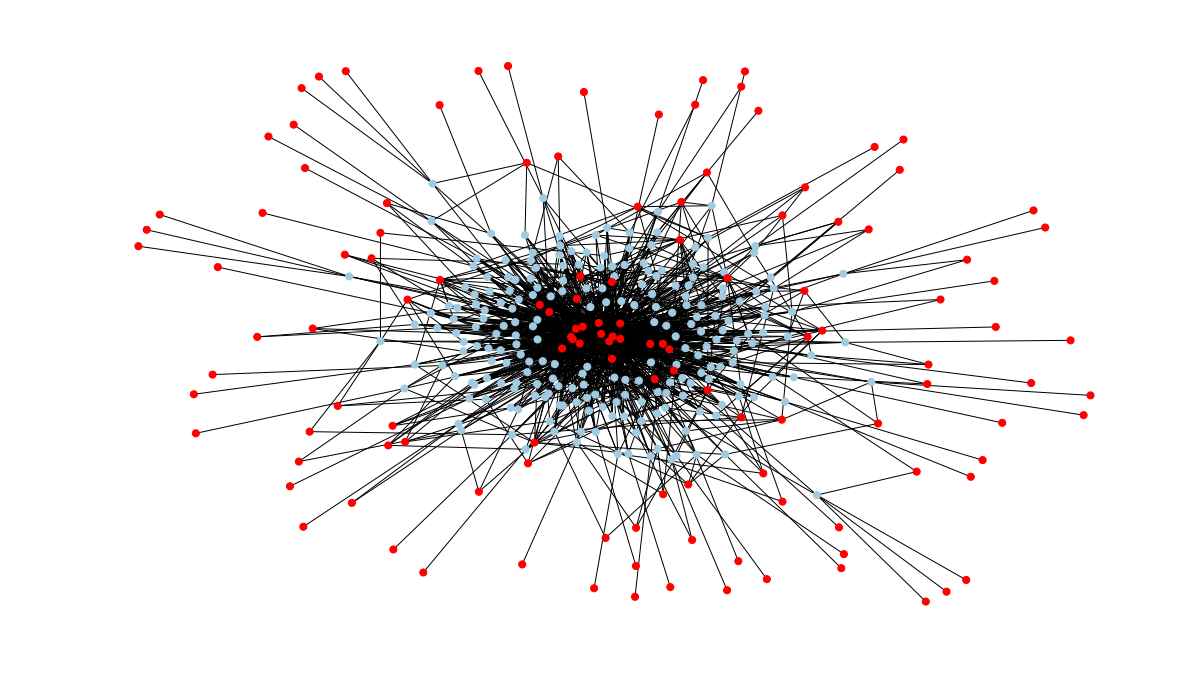

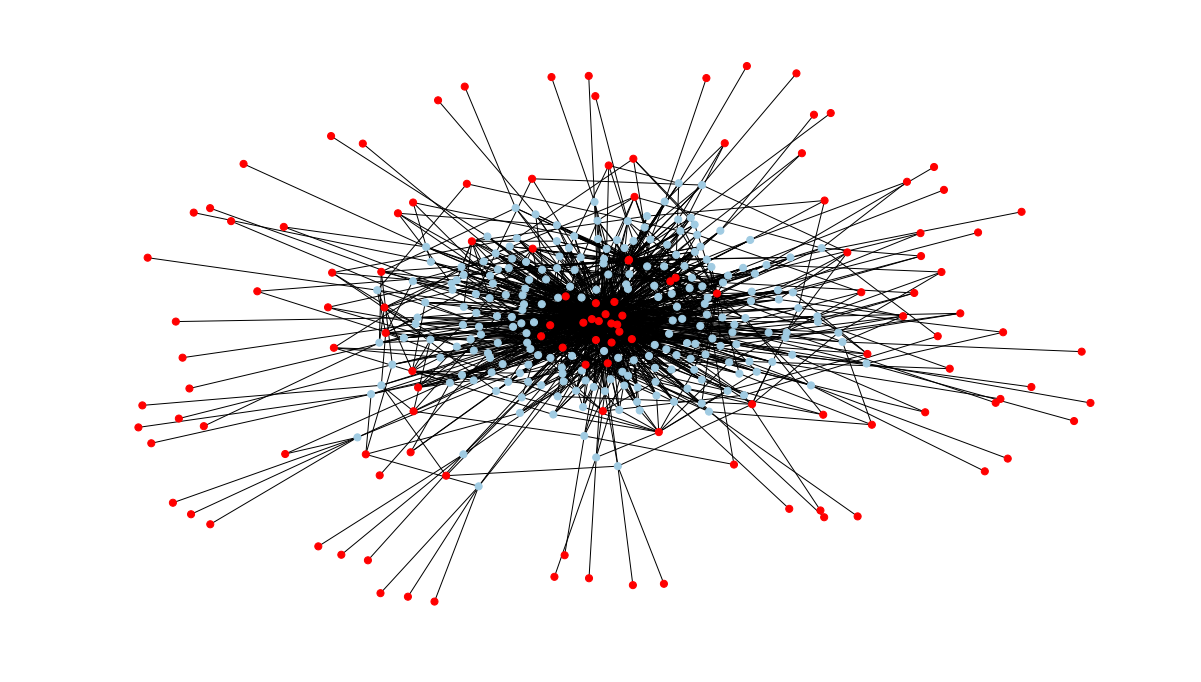

In [29]:
# Find users with degree>1
users_1=[]
for x in users_out:
    if x[1]==6:
        users_1.append(x[0])
   
star_manygaze = Stargaze_Network.subgraph(users_1+currencies)

curr_1=[]
for x in star_manygaze.in_degree(currencies):
    if x[1]>0:
        curr_1.append(x[0])
        
star_manygaze = Stargaze_Network.subgraph(users_1+curr_1)

colors=[]
for node, data in star_manygaze.nodes(data=True):
    if data["Type"]=="User":
        colors.append("#A0CBE2")
    else:
        colors.append("#FF0000")

fig = plt.figure(figsize=(16,9))
nx.draw_spring(star_manygaze.to_undirected(), node_size=50, node_color=colors)
#plt.savefig('showgraph.png')
plt.show()